In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split


In [2]:
hp= pd.read_csv("homeprices.csv")

In [3]:
hp

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [4]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      6 non-null      int64  
 1   bedrooms  5 non-null      float64
 2   age       6 non-null      int64  
 3   price     6 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 324.0 bytes


In [5]:
hp.describe()

,area,bedrooms,age,price
count,6.000000,5.00000,6.000000,6.000000
mean,3416.666667,4.20000,16.500000,648333.333333
std,587.934237,1.30384,8.288546,109117.673484
min,2600.000000,3.00000,8.000000,550000.000000
25%,3050.000000,3.00000,9.750000,572500.000000
50%,3400.000000,4.00000,16.500000,602500.000000
75%,3900.000000,5.00000,19.500000,722500.000000
max,4100.000000,6.00000,30.000000,810000.000000


In [6]:
hp.sample(5)

,area,bedrooms,age,price
0,2600,3.0,20,550000
4,4000,5.0,8,760000
1,3000,4.0,15,565000
5,4100,6.0,8,810000
2,3200,NaN,18,610000


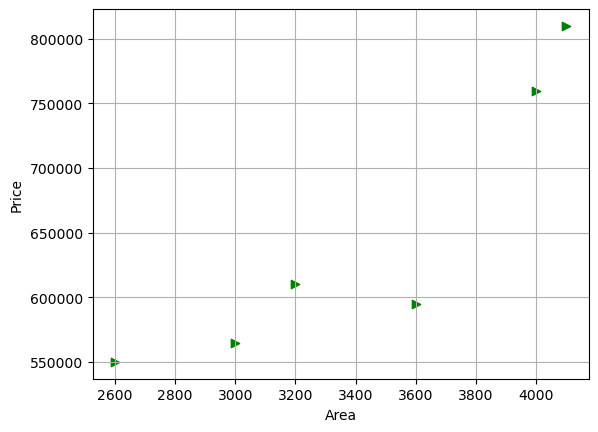

In [8]:
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(hp.area,hp.price,color='green',marker='>')
plt.grid()
plt.show()


In [7]:
hp.columns

Index(['area', 'bedrooms', 'age', 'price'], dtype='object')

In [9]:
hp.bedrooms.median()

4.0

In [10]:
hp.bedrooms = hp.bedrooms.fillna(hp.bedrooms.median())
hp

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [11]:
nhp = hp.drop("price",axis="columns")
nhp

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.0,18
3,3600,3.0,30
4,4000,5.0,8
5,4100,6.0,8


In [25]:
nop = hp.price
nop

0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64

In [31]:
fig = px.scatter_3d(nhp , x = nhp.area, y = nhp.bedrooms, z = nop)
fig.show()

In [28]:
reg = linear_model.LinearRegression()
reg.fit(hp.drop("price",axis="columns"),hp.price)

LinearRegression()

In [29]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [30]:
reg.intercept_

221323.00186540408

In [34]:
reg.predict([[2500,4,5]])

C:\Users\NM TRADERS\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([578876.03748933])

In [41]:
reg.predict([[2600,4,18]])

C:\Users\NM TRADERS\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([548069.94887132])

In [43]:
cp= pd.read_csv("carprices.csv")
cp

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


In [44]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Mileage        20 non-null     int64
 1   Age(yrs)       20 non-null     int64
 2   Sell Price($)  20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes


In [45]:
cp.describe()

,Mileage,Age(yrs),Sell Price($)
count,20.000000,20.000000,20.000000
mean,59736.500000,5.150000,25197.500000
std,20595.441825,1.785173,7834.479713
min,22500.000000,2.000000,12000.000000
25%,50500.000000,4.000000,19375.000000
50%,59000.000000,5.000000,26050.000000
75%,73750.000000,6.250000,31625.000000
max,91000.000000,8.000000,40000.000000


In [47]:
x = cp.drop("Sell Price($)",axis="columns")

In [48]:
x

,Mileage,Age(yrs)
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4
5,59000,5
6,52000,5
7,72000,6
8,91000,8
9,67000,6


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)